[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

/home/p305/.anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


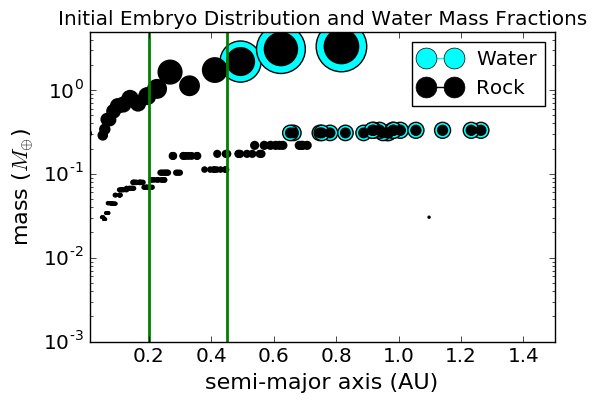

11
[ 0.15923942  0.          0.41055133  0.42609402  0.          0.35762326
  0.          0.31319912  0.          0.42290229  0.41916747  0.
  0.40921671  0.          0.          0.          0.          0.        ]


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

In [10]:
from pylab import genfromtxt
from numpy import flipud
import re
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.lines as mlines
import matplotlib.cm as cm
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from math import pi
import matplotlib.lines as mlines
big_line = 15
treeoutput = open("treeoutput", "r")
big = genfromtxt("waterbig2.txt")
big_mass = big[:,4]
big_frac = (big_mass[:]*.1)
big_frac[0:big_line] = 0
small_line = 160
small = genfromtxt("watersmall2.txt")
small_mass = small[:,4]
small_frac = (small_mass[:]*.1)
small_frac[0:small_line] = 0

#print(treeoutput)
print(small_frac)
#print(np.shape(mat1))
#print(np.shape(mat2))
stack = np.vstack((big_mass,big_frac))
stack2 = np.vstack((small_mass, small_frac))
stacked = np.hstack((stack, stack2))
#print(stacked.T)

#print(mat3[21])
with open('treeoutput', 'r') as data:
    output_data = []
    for dd in data.readlines():
        #print()
        dd = dd.strip()
       # print(dd)
        dd = dd.strip('[]')
        #print("'{}'".format(dd))
        numbers = dd.split(',')
       # print(numbers)
        numbers = [int(nn.strip()) for nn in numbers]
       # print(numbers, type(numbers), type(numbers[0]))
        output_data.append(numbers)
#print(output_data)
mass_tot = []
water_mass = []
mass_frac = []
for i in range (len(output_data)):
    this_planet = output_data[i]
    temp_mass = 0
    temp_water = 0
    for n in range(len(this_planet)):
        temp_mass = stacked[0,n] + temp_mass
        temp_water = stacked[1,n]+ temp_water
    mass_tot.append(temp_mass)
    mass_frac.append(temp_water/temp_mass)
    print(this_planet)
    print(temp_mass)
    print(temp_water)
    print(temp_water/temp_mass)
    print()

    water_mass.append(temp_water)
print(mass_tot)
print(water_mass)
arr=[]
for u in range(len(water_mass)):
    w_m= water_mass[u]
    m_t = mass_tot[u]
    arr.append(w_m/m_t)
print(arr)

bigparams = genfromtxt('bigparams.txt')

bigparams1 = bigparams.T

#small_params = genfromtxt('smallparams.txt')
print(np.shape(stacked))
print(np.shape(bigparams1))
mat = np.vstack((bigparams1, stacked))


#print(mat.shape)
#print(mat)







#print(mat0)


pyplot.scatter(mat[0,:], mat[9,:]/0.000003003, c= 'cyan', cmap = 'viridis', s=(mat[10,:]/0.000003003)*4000, edgecolor = 'k')
pyplot.scatter(mat[0,:], mat[9,:]/0.000003003, c= 'k', s=(mat[9,:]/0.000003003)*200, edgecolor='none' )

blue_dot = mlines.Line2D([],[], color='cyan', marker='o',
                          markersize=15, label='Water')

black_dot = mlines.Line2D([],[], color='black', marker='o',
                          markersize=15, label='Rock')
pyplot.legend(handles=[blue_dot, black_dot])
pyplot.xlabel("semi-major axis (AU)", fontsize = 16)
pyplot.ylabel("mass ($M_{\oplus}$)", fontsize = 16)
pyplot.title("Initial Embryo Distribution and Water Mass Fractions")
axes = pyplot.gca()
pyplot.ylim([.001,5])
pyplot.xlim([.01,1.5])
#pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend();
pyplot.show();

elements = genfromtxt("element.out")
arr2=np.asarray(arr)

arr2norm = (arr2-arr2.min())/(arr2.max()-arr2.min())


#print(len(arr2))
print(len(elements[:,4]))
print((arr2)*10)
arr5 = np.linspace(0,1,15)

arr3=np.zeros(18)
arr4=np.vstack((arr2,arr3))

pyplot.axvline(x=0.45, ymin=0, ymax = 10, linewidth=2, color='g')
pyplot.axvline(x=0.20, ymin=0, ymax = 10, linewidth=2, color='g')
pyplot.scatter(elements[:,1], elements[:,4]/0.000003003, s=elements[:,4]/0.000003003*100, color=[arr2norm[i] for i in range(0,17)], cmap='gist_earth_r')

pyplot.xlabel("Semi-Major Axis (AU)", fontsize = 16)
pyplot.ylabel("Mass ($M_{\oplus}$)", fontsize = 16)
pyplot.ylim([.001,10])
#pyplot.colorbar().set_label('Fractional Water Mass (%)')
pyplot.xlim([.01,5])
pyplot.xscale('log')
#pyplot.yscale('log')
pyplot.legend();
pyplot.show();
